In [123]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_val, y_val) = mnist.load_data()

#normalizeer data 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_val = tf.keras.utils.normalize(x_val,axis=1)

#build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 55us/step - loss: 0.3282 - acc: 0.9074
Epoch 2/3
60000/60000 [==============================] - 3s 46us/step - loss: 0.1483 - acc: 0.9548: 1
Epoch 3/3
60000/60000 [==============================] - 3s 47us/step - loss: 0.1074 - acc: 0.9670


In [161]:
val_acc = model.evaluate(x_val,y_val)
print(y_val)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 24us/step
[7 2 1 ... 4 5 6]
0.10475215148590505 [0.10924135311171412, 0.9676]


In [128]:
import matplotlib.pyplot as plt
# print(x_train[0])
# plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.show()

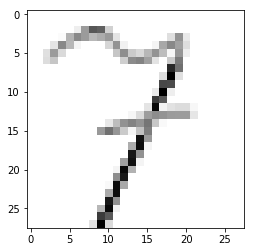

In [127]:
from PIL import Image
import numpy as np
im = Image.open('7.png','r')
pix_val = np.array(im.getdata())
width,height = im.size
    
newlist = []
for i in range(0,len(pix_val),28):
    row = []
    for j in pix_val[i:i+28]:
        row.append(abs(255 - np.average(j)))
    newlist.append(row)
np.array(newlist)

normpix = tf.keras.utils.normalize(newlist,axis=1)
plt.imshow(normpix,cmap = plt.cm.binary)
plt.show()

In [165]:
test = np.array(7)
zelf = model.evaluate(normpix,test)

IndexError: tuple index out of range